In [3]:
# Exemplo de como usar  graphviz
import pandas
from graphviz import Digraph
import datetime as dt
import pm4py
from datetime import datetime as date

### Importa o arquivo csv pelo pandas

In [8]:
#'sep' define que tipo de separação o arquivo tem, geralmente tem ',' como default event_log agora é uma 'tabela'
event_log = pm4py.format_dataframe(pandas.read_csv("C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example_3.csv", sep=';'), case_id='case_id', activity_key='activity', timestamp_key='timestamp')
event_log

,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,1,register request,2010-12-30 10:02:00+00:00,0,0
1,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,1,examine thoroughly,2010-12-31 09:06:00+00:00,1,0
2,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,1,check ticket,2011-01-05 14:12:00+00:00,2,0
3,1,decide,2011-01-06 10:18:00+00:00,200,Sara,1,decide,2011-01-06 10:18:00+00:00,3,0
4,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,1,reject request,2011-01-07 13:24:00+00:00,4,0
5,2,register request,2010-12-30 10:32:00+00:00,50,Mike,2,register request,2010-12-30 10:32:00+00:00,5,1
6,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,2,check ticket,2010-12-30 11:12:00+00:00,6,1
7,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,2,examine casually,2010-12-30 13:16:00+00:00,7,1
8,2,decide,2011-01-05 10:22:00+00:00,200,Sara,2,decide,2011-01-05 10:22:00+00:00,8,1
9,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,2,pay compensation,2011-01-08 11:05:00+00:00,9,1


### Filtra exibe o numero de casos e o número de eventos

In [59]:
num_cases = len(event_log.case_id.unique())
num_events = len(event_log)
print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

Number of events: 42
Number of cases: 6


### Organiza a lista em ordem de eventos pelo tempo

In [82]:
total_cases = event_log.case_id
clients = sorted(event_log.timestamp)
listaOrganizada = list(zip(total_cases, clients))
print("Lista de eventos organizado por tempo:\n {}".format(listaOrganizada))

Lista de eventos organizado pot tempo:
 [(1, Timestamp('2010-12-30 10:02:00+0000', tz='UTC')), (1, Timestamp('2010-12-30 10:32:00+0000', tz='UTC')), (1, Timestamp('2010-12-30 11:12:00+0000', tz='UTC')), (1, Timestamp('2010-12-30 13:16:00+0000', tz='UTC')), (1, Timestamp('2010-12-30 13:32:00+0000', tz='UTC')), (2, Timestamp('2010-12-30 14:06:00+0000', tz='UTC')), (2, Timestamp('2010-12-30 15:34:00+0000', tz='UTC')), (2, Timestamp('2010-12-31 09:06:00+0000', tz='UTC')), (2, Timestamp('2011-01-05 10:22:00+0000', tz='UTC')), (2, Timestamp('2011-01-05 14:12:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 08:02:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 08:18:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 10:18:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 11:18:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 12:06:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 14:02:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 14:02:00+0000', tz='UTC')), (3, Timestamp('2011-01-06 15:06:00+0000',

In [14]:
end_activities = pm4py.get_end_activities(event_log)
print("atividades finais:\n{}".format(end_activities))

atividades finais:
{'reject request': 3, 'pay compensation': 3}


In [37]:
# import pandas as pd
# import graphviz as gv
# from graphviz import Digraph
# from datetime import datetime
# import pm4py
# import os

# def import_csv(file_path):
#     event_log = pd.read_csv(file_path, sep=';')
#     event_log['timestamp'] = pd.to_datetime(event_log['timestamp'])

#     grafo = Digraph()
    
#     # Criação de nós com IDs únicos e labels de timestamp
#     for i, row in event_log.iterrows():
#         timestamp_str = row.timestamp
#         timestamp_str= timestamp_str.strftime('%Y-%m-%d %H:%M:%S')
#         grafo.node(str(i), label=timestamp_str)
    
#     # Criação de arestas entre eventos sequenciais
#     for i in range(len(event_log) - 1):
#         grafo.edge(str(i), str(i + 1))

#     grafo.render('meu_grafo', format='png', cleanup=True)

# if __name__ == "__main__":
#     import_csv("C:\\Users\\meduarda\\grupo-2\\Bases_de_Dados\\running-example_3.csv")

# # não é uma rede de petri, eu estou aprendendo a usar o graphviz ainda

### Calcula a média de tempo

In [114]:
if __name__ == "__main__":
    # Dicionário para cada pessoa
    # listaPessoas = list(event_log['case_id'])
    # listaProcessos = list(event_log['activity'])
    # listaPeriodos = list(event_log['timestamp'])
    # # Cria um dicionário tendo como chave uma pessoa e um valor com listas de eventos e o horário que começou
    # dicPessoas = {}
    # for (i,pessoa) in enumerate(listaPessoas):
    #     if pessoa in dicPessoas:
    #         dicPessoas[pessoa] += tuple([[listaProcessos[i],listaPeriodos[i]]])
    #     else:
    #         dicPessoas[pessoa] = tuple([[listaProcessos[i],listaPeriodos[i]]])

    # dicIntervalos = {}
    # listaVazia = []
    # for key, value in dicPessoas.items():
    #     for atividades in value:
    #         print(atividades)
    #         atividades[1] = atividades[1][:-6]
    #         date.strptime(atividades[1], '%Y-%m-%d %H:%M:%S')
    #         listaVazia.append(atividades)
            
        
    #     for (i,el) in enumerate(listaVazia):
    #         if el[0] not in dicIntervalos:
    #             if i == (len(listaVazia)-1):
    #                 dicIntervalos[el[0]] == 0
    #             else:
    #                 dicIntervalos[el[0]] = listaVazia[i+1][1] - el[1]
    #         else:
    #             dicIntervalos[el[0]] += listaVazia[i+1][1] - el[1]
    pessoa = pm4py.filter_event_attribute_values(event_log, attribute_key='case:concept:name', values={'3'}, level='event')
    total_duration = 0
    total_events = 0
    for event in pessoa:
        print(event)
        # total_duration += event['time:timestamp'].timestamp() - pessoa[0]['time:timestamp'].timestamp()
        # total_events += 1
    # print(total_events, total_duration)


case_id
activity
timestamp
costs
resource
case:concept:name
concept:name
time:timestamp
@@index
@@case_index
start_timestamp


In [120]:
# import pandas
from datetime import datetime as dt

if __name__ == "__main__":
    log = pandas.read_csv('C:\\Users\\meduarda\\grupo-2-2\\Bases_de_Dados\\running-example_3.csv', sep = ';')

    listaAtividades = list(log.activity)
    listaCasos = list(log.case_id)
    listaHoras = list(log.timestamp)

    for (i, hora) in enumerate(listaHoras):
        hora = dt.strptime(hora,"%Y-%m-%d %H:%M:%S%z")
        listaHoras[i] = hora.replace(tzinfo=None)

    dicPessoas = {}
    for (i,pessoa) in enumerate(listaCasos):
        if pessoa in dicPessoas:
            dicPessoas[pessoa] += tuple([[listaAtividades[i],listaHoras[i]]])
        else:
            dicPessoas[pessoa] = tuple([[listaAtividades[i],listaHoras[i]]])

    
    dicIntervalos = {}
    listaVazia = []
    for key, value in dicPessoas.items():
        
        for atividades in value:
            listaVazia.append(atividades)
        for (i,el) in enumerate(listaVazia):
            if el[0] not in dicIntervalos:
                if i == (len(listaVazia)-1):
                    dicIntervalos[el[0]] == 0
                else:
                    dicIntervalos[el[0]] = listaVazia[i+1][1] - el[1]
                    print(dicIntervalos)
            else:
                dicIntervalos[el[0]] += listaVazia[i+1][1] - el[1]

print(dicIntervalos)

{'register request': datetime.timedelta(seconds=2040)}
{'register request': datetime.timedelta(seconds=2040), 'examine casually': datetime.timedelta(seconds=5280)}
{'register request': datetime.timedelta(seconds=2040), 'examine casually': datetime.timedelta(seconds=5280), 'check ticket': datetime.timedelta(days=6, seconds=60240)}
{'register request': datetime.timedelta(seconds=2040), 'examine casually': datetime.timedelta(seconds=5280), 'check ticket': datetime.timedelta(days=6, seconds=60240), 'decide': datetime.timedelta(seconds=10800)}
{'register request': datetime.timedelta(seconds=2040), 'examine casually': datetime.timedelta(seconds=5280), 'check ticket': datetime.timedelta(days=6, seconds=60240), 'decide': datetime.timedelta(seconds=10800), 'reinitiate request': datetime.timedelta(seconds=2880)}
{'register request': datetime.timedelta(seconds=2040), 'examine casually': datetime.timedelta(seconds=5280), 'check ticket': datetime.timedelta(days=6, seconds=60240), 'decide': datetime

KeyError: 'pay compensation'

FUNÇÕES INTERESSANTES:
### pm4py
.format_dataframe() --- cria uma cópia do log de eventos e renomeia as colunas para nomes padroes do pm4py(arquivos csv).
.read_xes(file_path) --- carrega um arquivo xes para o pm4py como um objeto Log de Eventos
.get_start_activities(event_log) ---
.get_end_activities(event_log) --- retorna um dicionário com atividade final de cada evento e quantas vezes ela acontece
.write_xes() --- transforma um quadro de dados do pandas em um arq .xes
.convert_to_dataframe() --- converte o log de eventos em quadro de dados que pode ser exportado com o pandas (ex:transformar em csv)
### pandas
.read_csv(<<caminho do código>>, sep=';')
event_log.to_csv() --- importa o arquivo csv de exemplo em execução como um quadro de dados do pandas e o exporta para um arquivo csv no local
### graphviz


In [21]:
import pm4py
import datetime as dt

def import_xes(file_path):
    event_log = pm4py.read_xes(file_path)
    # start_activities = pm4py.get_start_activities(event_log)
    # end_activities = pm4py.get_end_activities(event_log)
    # process_tree = pm4py.discover_process_tree_inductive(event_log)
    # bpmn_model = pm4py.convert_to_bpmn(process_tree)
    # pm4py.view_bpmn(bpmn_model)
    #print('FILTRA OS ATENDENTES APENAS EM PETE:\n', filltred)
    filltred = pm4py.filter_event_attribute_values(event_log, attribute_key='org:resource', values={'Pete'}, level='event')
    #filtra apenas trilhas onde diuas atividades acontecem durante o evento
    filtered5 = pm4py.filter_eventually_follows_relation(event_log, [('examine casually', 'reject request')])
    #filtra o log de eventos baseado num determinado intervalo de tempo
    filtered6 = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 10), dt.datetime(2011, 1, 1), mode='events')
    #filtra o log de eventos baseado num determinado intervalo de tempo, pega qualquer caminho que contém pelo menos um evento que se enquadre no caminho
    filtered6 = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 10), dt.datetime(2011, 1, 1), mode='traces_intersecting')

    # ainda não entendi o que faz
    filtered2 = pm4py.filter_trace_attribute_values(event_log, 'concept:name', {'register request'}, retain=False)
    
    # filtra uma sequencia inteira
    filtered3 = pm4py.filter_variants(event_log, [['register request', 'examine casually']])

    # ainda não entendi o que faz também
    filtered4 = pm4py.filter_directly_follows_relation(event_log, [('register request', 'examine thoroughly')], retain=True)
    print(filtered3)
    # print(filtered3)
    # print(filtered4)


if __name__ == "__main__":
    import_xes("C:\\Users\\meduarda\\Downloads\\running-example.xes")


# if __name__ == "__main__":
#     event_log = pm4py.read_xes('C:\\Users\\meduarda\\Downloads\\running-example.xes')
#     pm4py.write_xes(event_log, 'C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example-exported.xes')

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1996.65it/s]

Empty DataFrame
Columns: [concept:name, time:timestamp, cost:total, org:resource, @@index, case:concept:name]
Index: []


C:\Users\meduarda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1648.60it/s]

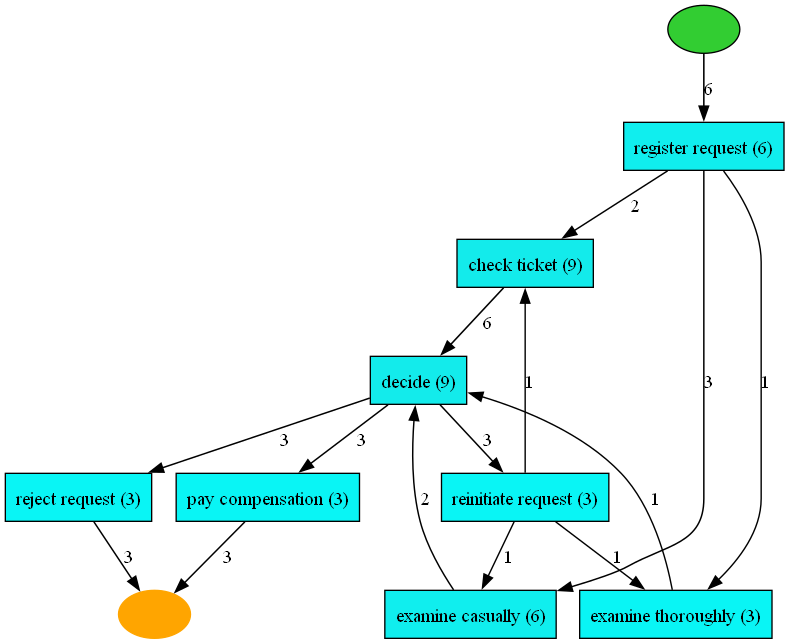

In [4]:
if __name__ == "__main__":
    log = pm4py.read_xes('C:\\Users\\meduarda\\Downloads\\running-example.xes')

    map = pm4py.discover_heuristics_net(log)
    pm4py.view_heuristics_net(map)

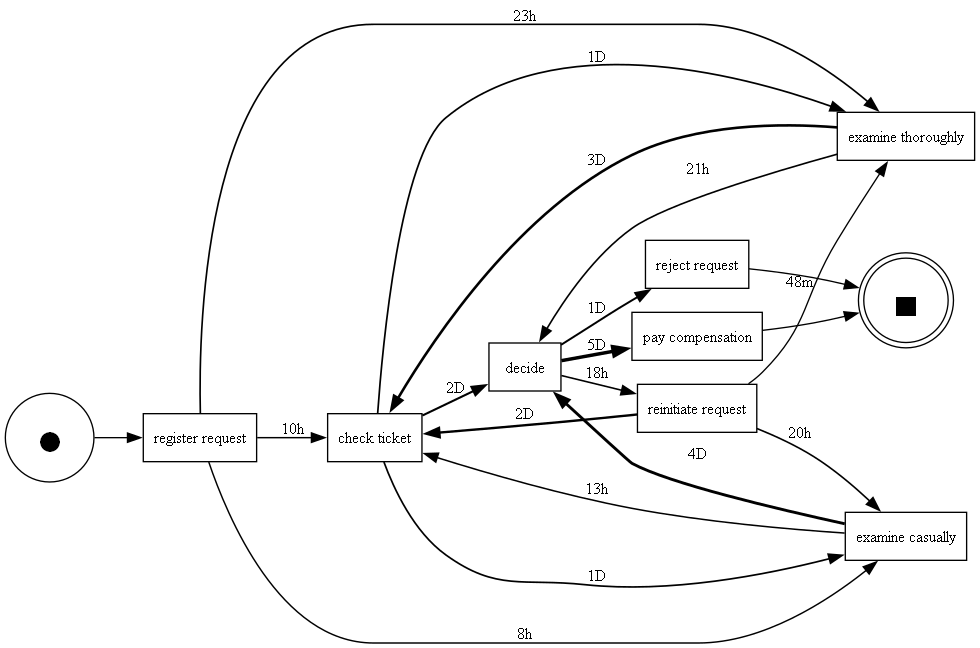

In [12]:

performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(event_log, case_id_key='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
pm4py.view_performance_dfg(performance_dfg, start_activities, end_activities)

In [22]:
import pm4py
import datetime as dt

if __name__ == "__main__":
    event_log = pm4py.read_xes("C:\\Users\\meduarda\\Downloads\\running-example.xes")
    print(event_log)

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1645.15it/s]

          concept:name            time:timestamp  cost:total org:resource  \
0     register request 2010-12-30 11:02:00+00:00          50         Pete   
1   examine thoroughly 2010-12-31 10:06:00+00:00         400          Sue   
2         check ticket 2011-01-05 15:12:00+00:00         100         Mike   
3               decide 2011-01-06 11:18:00+00:00         200         Sara   
4       reject request 2011-01-07 14:24:00+00:00         200         Pete   
5     register request 2010-12-30 11:32:00+00:00          50         Mike   
6         check ticket 2010-12-30 12:12:00+00:00         100         Mike   
7     examine casually 2010-12-30 14:16:00+00:00         400         Sean   
8               decide 2011-01-05 11:22:00+00:00         200         Sara   
9     pay compensation 2011-01-08 12:05:00+00:00         200        Ellen   
10    register request 2010-12-30 14:32:00+00:00          50         Pete   
11    examine casually 2010-12-30 15:06:00+00:00         400         Mike   